Cosmology (compact) SS2020

#  Exercise sheet 2

## 2. The evolution of the densities of the various components of the Universe

In [1]:
import astropy.constants as cst
import scipy.integrate as intg
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

H0 = 67 # km/s /Mpc
km_Mpc = (u.km/u.Mpc).to(1)

def a(z):
    return 1/(1+z)

def E(z, dict):
    return np.sqrt(dict["Omega_r0"]*(1+z)**4+dict["Omega_m0"]*(1+z)**3+(1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"])*(1+z)**2+dict["Omega_L0"])

# Hubble factor
def H(z, dict):
    return H0*E(z,dict)
H_vectorized = np.vectorize(H)

# Cosmic time 
def t_integrand(x, dict):
    return -1/(H(x, dict)*km_Mpc*(1+x))
def t(z, dict):
    return intg.quad(t_integrand, np.inf, z, args=(dict,))
t_vectorized = np.vectorize(t)

# Density parameters
def Omega_m(z, dict):
    return dict["Omega_m0"]*(1+z)**3/E(z, dict)**2
def Omega_r(z, dict):
    return dict["Omega_r0"]*(1+z)**4/E(z, dict)**2
def Omega_L(z, dict):
    return dict["Omega_L0"]/E(z, dict)**2
def Omega_K(z, dict):
    Omega_K0 = 1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"]
    return Omega_K0*(1+z)**2/E(z, dict)**2


In [2]:
EdS = {"Omega_m0": 1, "Omega_L0": 0, "Omega_r0": 0}
U1 = {"Omega_m0": 0.7, "Omega_L0": 0, "Omega_r0": 0}
LCDM = {"Omega_m0": 0.315, "Omega_L0": 0.685, "Omega_r0": 2.47*10**(-5)*(H0/100)**(-2)}

In [36]:
print(2.47*10**(-5)*(H0/100)**(-2))

5.502339051013589e-05


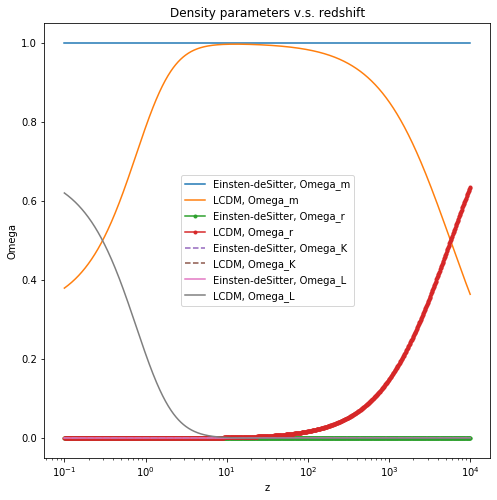

In [3]:
z = np.logspace(-1,  4, num=1000)
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_m(z,EdS), label = "Einsten-deSitter, Omega_m")
plt.plot(z, Omega_m(z,LCDM), label = "LCDM, Omega_m")
plt.plot(z, Omega_r(z,EdS), ".-", label = "Einsten-deSitter, Omega_r")
plt.plot(z, Omega_r(z,LCDM), ".-", label = "LCDM, Omega_r")
plt.plot(z, Omega_K(z,EdS), "--", label = "Einsten-deSitter, Omega_K")
plt.plot(z, Omega_K(z,LCDM), "--", label = "LCDM, Omega_K")
plt.plot(z, Omega_L(z,EdS), "-", label = "Einsten-deSitter, Omega_L")
plt.plot(z, Omega_L(z,LCDM), "-", label = "LCDM, Omega_L")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

To find out the redshift of three equivalence epochs in the standard cosmological model we plot its density parameters again and identify where the curves intersect. 

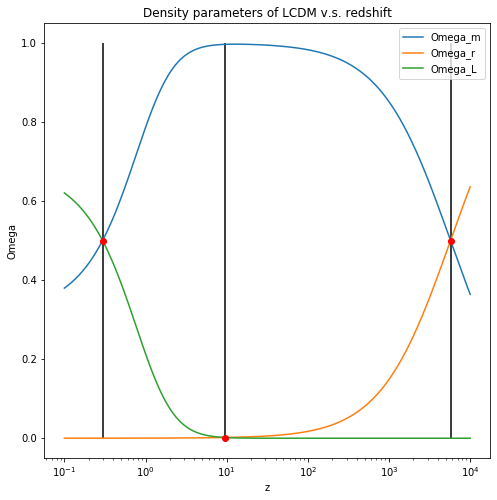

Omega_m and Omega_L intersects at z ~ 0.30
Omega_m and Omega_r intersects at z ~ 5751.22
Omega_L and Omega_r intersects at z ~ 9.59


In [4]:
plt.figure(figsize = [8, 8])
rho_m = Omega_m(z,LCDM)
rho_r = Omega_r(z,LCDM)
rho_L = Omega_L(z,LCDM)
plt.plot(z, rho_m, label = "Omega_m")
plt.plot(z, rho_r, label = "Omega_r")
plt.plot(z, rho_L, label = "Omega_L")

idx = np.argwhere(np.isclose(rho_L, rho_m, atol=0.001)).reshape(-1)
plt.plot(z[idx], rho_m[idx], 'ro')
plt.vlines(z[idx], 0, 1)
idx2 = np.argwhere(np.isclose(rho_r, rho_m, atol=0.003)).reshape(-1)
plt.plot(z[idx2], rho_m[idx2], 'ro')
plt.vlines(z[idx2], 0, 1)
idx3 = np.argwhere(np.isclose(rho_r, rho_L, atol=0.00005)).reshape(-1)
plt.plot(z[idx3], rho_r[idx3], 'ro')
plt.vlines(z[idx3], 0, 1)

plt.xscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters of LCDM v.s. redshift")
plt.show()

print("Omega_m and Omega_L intersects at z ~ %.2f"%(z[idx]))
print("Omega_m and Omega_r intersects at z ~ %.2f"%(z[idx2]))
print("Omega_L and Omega_r intersects at z ~ %.2f"%(z[idx3]))
idx4 = np.argwhere(np.isclose(rho_r, rho_L, atol=0.00005)).reshape(-1)

From the above plot we see that the 3 equivalence epochs are at z ~ 0.30 (matter, cosmological constant equivalence), z ~ 5751 (matter, radiation equivalence), z ~ 9.6 (radiation, cosmological constant equivalence). The radiation-dominated era is before z ~ 5751, the matter-dominated era is between z ~ 5751 and z ~ 0.30, the dark-energy-dominated era is after z ~ 0.30.

The Sun is about 4.6 Gyrs old, i.e. about $13.7 - 4.6 = 9.1$ Gyrs younger than our Universe. Thus we solve $z$ from $t(z) = 9.1 $ Gyr. 

Dinosaurs extincted about 66 million years ago, i.e. at cosmic time about $13.7 - 0.066 ~= 13.6$ Gyr. One could say it corresoponds to z ~ 0. 

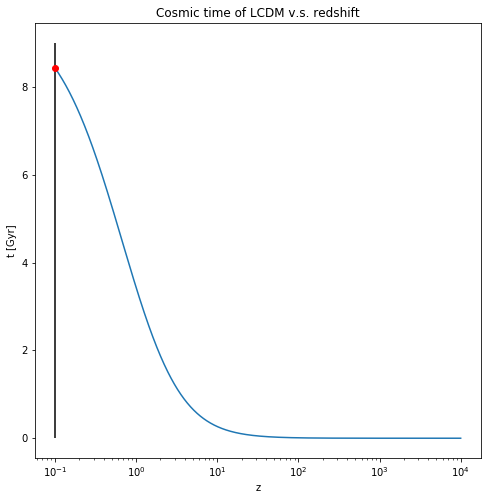

The birth of the Sun corresponds to z ~ 0.10


In [28]:
plt.figure(figsize = [8, 8])
s_to_Gyr = (u.second/u.Gyr).to(1)
time = t_vectorized(z, flat)[0]*s_to_Gyr
plt.plot(z, time)

idx4 = np.argwhere(np.isclose(9.1, time, atol=0.68)).reshape(-1)
plt.plot(z[idx4], time[idx4], 'ro')
plt.vlines(z[idx4], 0, 9)

plt.xscale("log")
plt.xlabel("z")
plt.ylabel("t [Gyr]")
plt.title("Cosmic time of LCDM v.s. redshift")
plt.show()

print("The birth of the Sun corresponds to z ~ %.2f"%(z[idx4]))

## 3. the age of the Universe and the standard cosmological scenario

Using functions defined above and values of cosmological paramters from the table, we determine the age of the Universe as $t(z=0)$. 

The expansion of the Universe started to accelerate when $\dot a = 0$. We plot $\dot a$ versus cosmic time and determine the turning point.

To determine the age of the Universe at which the energy density in matter and the cosmological constant were equal is to solve $t(z=0.30)$, using the results from Problem 2.2. 

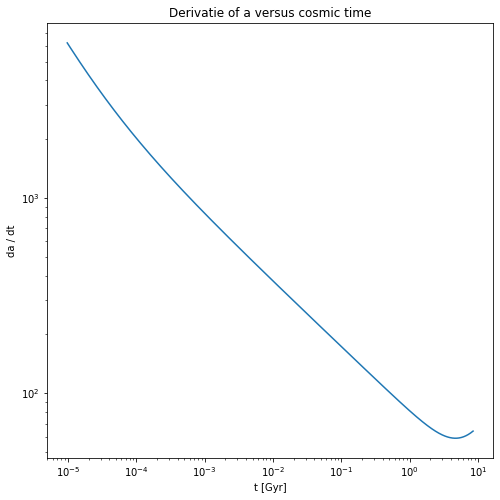

The age of the Universe is about 13.9 Gyr
The age of the Universe at which the expansion of the Universe started to accelerate is about 4.7 Gyr
the age of the Universe at which the energy density in matter and the cosmological constant were equal is about 10.3 Gyr


In [35]:
plt.figure(figsize = [8, 8])
adot =  H(z, LCDM)/(1+z)
plt.plot(time, adot)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("t [Gyr]")
plt.ylabel("da / dt")
plt.title("Derivatie of a versus cosmic time")
plt.show()

idx5 = np.argmin(adot)

age1 = t(0, LCDM)[0]*s_to_Gyr
print("The age of the Universe is about %.1f Gyr"%(age1))
print("The age of the Universe at which the expansion of the Universe started to accelerate is about %.1f Gyr"%(time[idx5]))
age3 = t(0.30, LCDM)[0]*s_to_Gyr
print("the age of the Universe at which the energy density in matter and the cosmological constant were equal is about %.1f Gyr"%(age3))

## 4. Galaxies, redshift, and cosmic time

In [25]:
age4 = t(11.1, LCDM)[0]*s_to_Gyr
print("The age of the Universe at which the galaxies of z = 11.1 formed is about %.1f Gyr"%(age4))
print("It corresponds to a fraction of %.2f of the universe history"%(age4/age1))
def D_com_integrand(x, dict):
    return 1/E(x, dict)
def D_com(z, dict):
    return intg.quad(D_com_integrand, 0, z, args=(dict,))
def D_phys(z, dict):
    return D_com(z, dict)[0]/(1+z)
c_H0 = (cst.c/(H0*km_Mpc)).to(u.Mpc/u.s)
print("These galaxies have a comoving distance from us of about %.2f Mpc"%(D_com(11.1, LCDM)[0]*c_H0.value))
print("These galaxies have a physical distance from us of about %.2f Mpc"%(D_phys(11.1, LCDM)*c_H0.value))

The age of the Universe at which the galaxies of z = 11.1 formed is about 0.4 Gyr
It corresponds to a fraction of 0.03 of the universe history
These galaxies have a comoving distance from us of about 9912.08 Mpc
These galaxies have a physical distance from us of about 819.18 Mpc
